In [18]:
# boostring é classificador mais complexo e é uma somatória de outros classificadores

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# semente
rng = np.random.RandomState(1)

In [44]:
df = pd.read_csv("data/ftrespostaK2010.csv")

train, test = train_test_split(df, test_size=0.2)

Xtrain = train[['Z']]
Ytrain = train[['factor']].values.ravel()

Xtest = test[['Z']]
Ytest = test[['factor']].values.ravel()

In [54]:
# parâmetros usados:

# Calcula a regressão baseada em DT
regrDT = DecisionTreeRegressor(max_depth=3)
regrDT.fit(Xtrain, Ytrain)

# Calcula a regressão baseada em GBRT

# Número de iterações/estimadores: n_estimators: 
# Taxa de aprendizado: learning_rate;
# Profundidade máxima de cada árvore: max_depth;
# Semente aleatória: random_state;

GBRT = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.9,     
                                  max_depth=5, 
                                  random_state=0)

GBRT.fit(Xtrain, Ytrain)

GradientBoostingRegressor(learning_rate=0.9, max_depth=5, random_state=0)

In [55]:
# Prediz o valor da função baseada na DT
y_DT = regrDT.predict(Xtest)

# Prediz o valor da função baseada no GBRT
y_GBRT = GBRT.predict(Xtest)

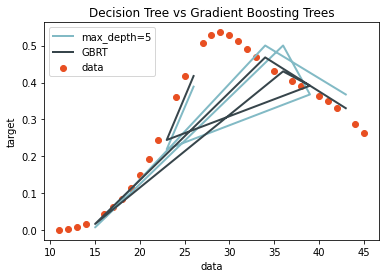

In [56]:
# Apresenta os resultados num gráfico
plt.figure()
plt.scatter(Xtrain, Ytrain, c="#E84F22", label="data")
plt.plot(Xtest, y_DT, color="#82BAC5", label="max_depth=5", linewidth=2)
plt.plot(Xtest, y_GBRT, color="#37454B", label="GBRT", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree vs Gradient Boosting Trees")
plt.legend()
plt.show()

In [74]:
#  predizer os preços de casas (MEDV) baseado em 13 atributos.

from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [61]:
# Cria um conjunto de dados rotulados, embaralhando a ordem dos dados originais.
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)

In [68]:
# Separa o conjunto em treino (90%) e teste 
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [75]:
# dicionário de parâmetros
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [77]:
# modelo
clf = GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [78]:
# Erro de treinamento
mseTrain = mean_squared_error(y_train, clf.predict(X_train))
mseTrain

1.7677391462344385

In [80]:
# Erro de teste
mseTest = mean_squared_error(y_test, clf.predict(X_test))
mseTest

6.664112011610409

Text(0, 0.5, 'Deviance')

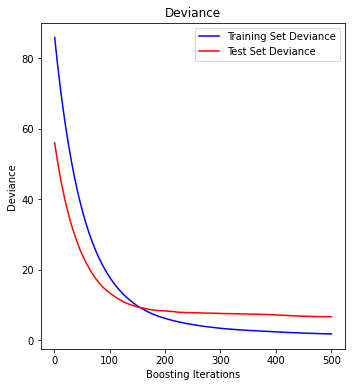

In [83]:
# Apresenta um gráfico do erro de treinamento e de teste para cada iteração do GBRT
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

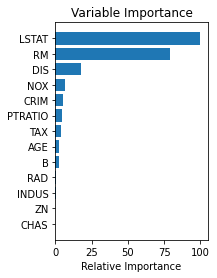

In [84]:
# Importância das variáveis

# Extrai a importância calculada de cada característica.
feature_importance = clf.feature_importances_

# Calcula a importância relativa em relação à máxima importância.
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Apresenta um gráfico por ordem de importância.
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()